In [1]:
import sys
import os
import numpy as np
from pathlib import Path
from scipy.stats import pearsonr
root = Path(os.getcwd()).parent.parent
sys.path.append(str(Path(os.getcwd()).parent))
np.set_printoptions(threshold=sys.maxsize, suppress=True)

In [2]:
from constant import FeatureType
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import argparse
import hashlib
import math

## Settings

In [3]:
parser = argparse.ArgumentParser()
args = parser.parse_args("")

# ====== Model ====== #
args.frame_in = 72
args.frame_out = 24


# ====== Data ====== #
args.years = [2017, 2018, 2019]
args.region = "Jindo"
args.station = 192

# ====== Features ====== #
features = [FeatureType.SUNSHINE,
            FeatureType.GROUND_TEMPERATURE,
            FeatureType.HUMIDITY,
            FeatureType.WIND_SPEED,
            FeatureType.WIND_DIRECTION,
            FeatureType.TEMPERATURE,
            FeatureType.VISIBILITY,
            FeatureType.PRECIPITATION,
            FeatureType.STEAM_PRESSURE,
            FeatureType.DEW_POINT_TEMPERATURE,
            FeatureType.ATMOSPHERIC_PRESSURE]

## Results

In [4]:
result_path = os.path.join(root, 'results', 'fix_learning_rate.csv')
result_df = pd.read_csv(result_path, encoding='euc-kr')
result_df = result_df.set_index('time')
result_df

,1th model,2th model,3th model,4th model,5th model,6th model,7th model,8th model,9th model,10th model,11th model,y_test
time,,,,,,,,,,,,
2019-05-30 00:00:00,3.944935,9.373753,8.991776,-4.980513,9.776340,8.246685,2.154526,2.215499,-2.579093,-7.726900,6.110557,0.0
2019-05-30 01:00:00,-1.099738,-2.992160,21.548922,0.032667,19.588190,2.121203,-1.746548,3.298188,-2.794984,-4.378327,10.919757,0.0
2019-05-30 02:00:00,-6.087976,-3.116281,12.902204,1.042270,14.011045,2.642012,-1.681669,4.645596,-0.458888,-5.786788,7.292140,0.0
2019-05-30 03:00:00,-10.354701,-0.957802,6.922178,-2.497863,15.239254,3.514449,0.204502,-0.081249,-2.242362,-2.382093,4.467662,0.0
2019-05-30 04:00:00,-13.795790,-0.045030,2.983664,-5.629596,9.083643,4.103181,5.037640,-0.310824,0.664487,-5.366416,5.864890,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,2.494665,-1.609719,11.314662,10.095613,14.178468,3.872022,1.885814,2.832604,1.577955,-8.532868,7.591291,0.0
2019-12-31 20:00:00,-0.655231,-4.287845,11.537020,8.813722,13.148743,2.469659,0.935623,1.622824,5.140968,-6.065034,8.265720,0.0
2019-12-31 21:00:00,-2.602099,-3.438886,11.175261,8.692076,12.867442,2.473365,3.462597,0.863285,5.895471,-6.136200,9.580794,0.0


### NRMSE

In [5]:
nrmse_list = []

for i in range(len(features)):
    col_name = '%dth model' % (i + 1)
    y_pred = result_df[col_name]
    y_test = result_df['y_test']
    
    zero_indices = np.where(y_test == 0)
    y_pred_list = y_pred.to_numpy()
    y_test_list = y_test.to_numpy()
    
    y_test_adjusted = np.delete(y_test_list, zero_indices)
    y_pred_adjusted = np.delete(y_pred_list, zero_indices)

    rmse = np.sqrt(mean_squared_error(y_test_adjusted, y_pred_adjusted))
    max_min = np.max(y_test_adjusted) - np.min(y_test_adjusted)
    nrmse = rmse / max_min
    nrmse_list.append(nrmse)

    print(col_name)
    print('rmse:', rmse)
    print('nrmse:', nrmse)
    print()

1th model
rmse: 59.90602313440684
nrmse: 0.1951336258449734

2th model
rmse: 61.336661702076704
nrmse: 0.19979368632598274

3th model
rmse: 55.64362624940329
nrmse: 0.18124959690359377

4th model
rmse: 54.38508692954192
nrmse: 0.1771501202916675

5th model
rmse: 56.41226501067528
nrmse: 0.18375330622369798

6th model
rmse: 48.96343002355258
nrmse: 0.1594900000767185

7th model
rmse: 49.03273218739804
nrmse: 0.15971574002409786

8th model
rmse: 56.212838436030395
nrmse: 0.18310370826068534

9th model
rmse: 48.14830904479509
nrmse: 0.1568348828820687

10th model
rmse: 49.740735700508054
nrmse: 0.16202194039253437

11th model
rmse: 46.163779787842024
nrmse: 0.15037061820143982



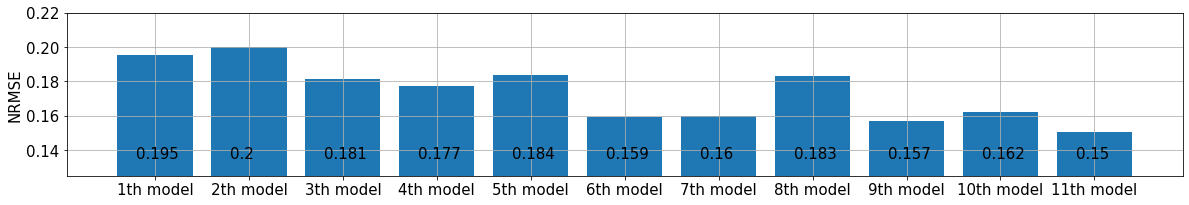

In [17]:
fig, ax= plt.subplots(1, 1, figsize=(20, 3))
plt.rcParams.update({'font.size': 15})
ax.bar(['%dth model' % (i + 1) for i in range(11)], nrmse_list)
for index, value in enumerate(nrmse_list):
    ax.text(index - 0.2, 0.135, str(round(value, 3)))
plt.ylabel('NRMSE')
plt.ylim(0.125, 0.22)
plt.grid(True)
plt.show()

## Value

In [7]:
result_df.index = pd.to_datetime(result_df.index, format = '%Y-%m-%d %H:%M:%S').strftime('%m/%d %H:%M')
result_df

,1th model,2th model,3th model,4th model,5th model,6th model,7th model,8th model,9th model,10th model,11th model,y_test
time,,,,,,,,,,,,
05/30 00:00,3.944935,9.373753,8.991776,-4.980513,9.776340,8.246685,2.154526,2.215499,-2.579093,-7.726900,6.110557,0.0
05/30 01:00,-1.099738,-2.992160,21.548922,0.032667,19.588190,2.121203,-1.746548,3.298188,-2.794984,-4.378327,10.919757,0.0
05/30 02:00,-6.087976,-3.116281,12.902204,1.042270,14.011045,2.642012,-1.681669,4.645596,-0.458888,-5.786788,7.292140,0.0
05/30 03:00,-10.354701,-0.957802,6.922178,-2.497863,15.239254,3.514449,0.204502,-0.081249,-2.242362,-2.382093,4.467662,0.0
05/30 04:00,-13.795790,-0.045030,2.983664,-5.629596,9.083643,4.103181,5.037640,-0.310824,0.664487,-5.366416,5.864890,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12/31 19:00,2.494665,-1.609719,11.314662,10.095613,14.178468,3.872022,1.885814,2.832604,1.577955,-8.532868,7.591291,0.0
12/31 20:00,-0.655231,-4.287845,11.537020,8.813722,13.148743,2.469659,0.935623,1.622824,5.140968,-6.065034,8.265720,0.0
12/31 21:00,-2.602099,-3.438886,11.175261,8.692076,12.867442,2.473365,3.462597,0.863285,5.895471,-6.136200,9.580794,0.0


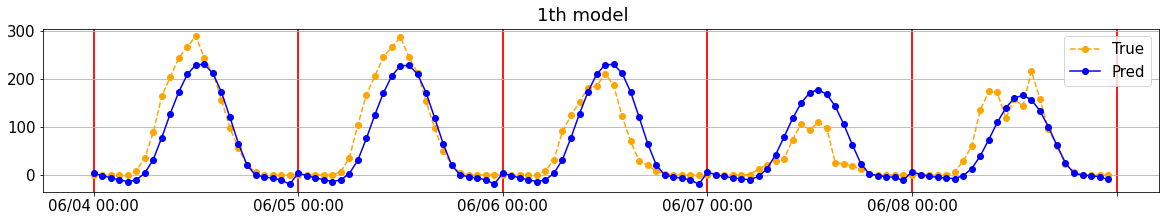

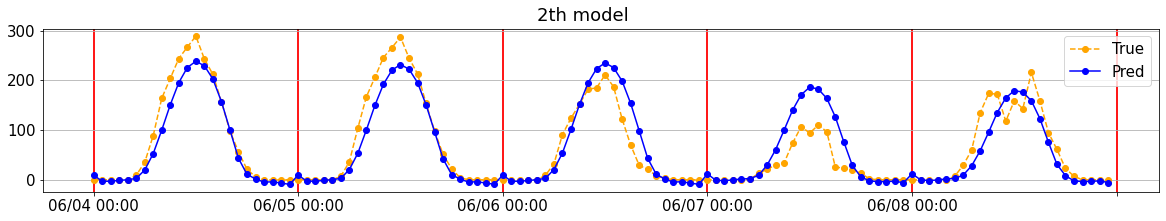

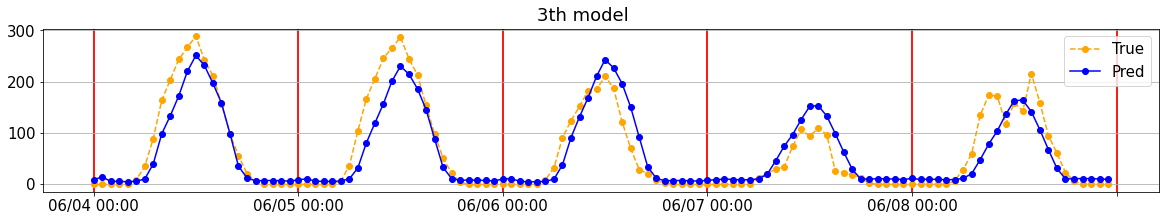

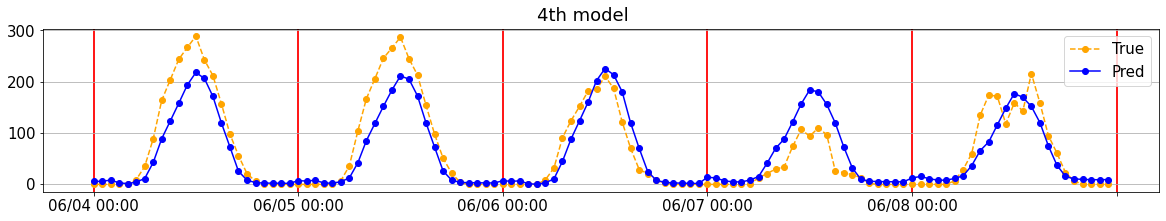

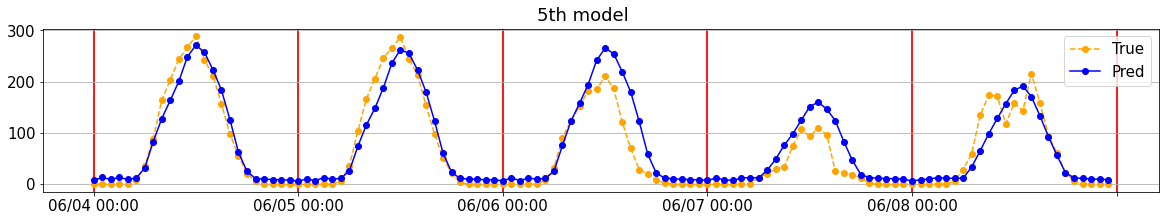

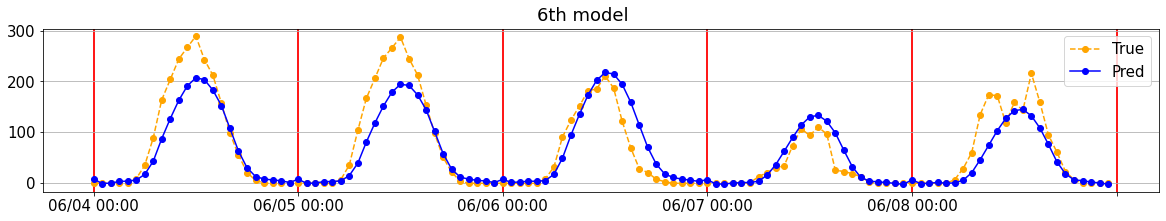

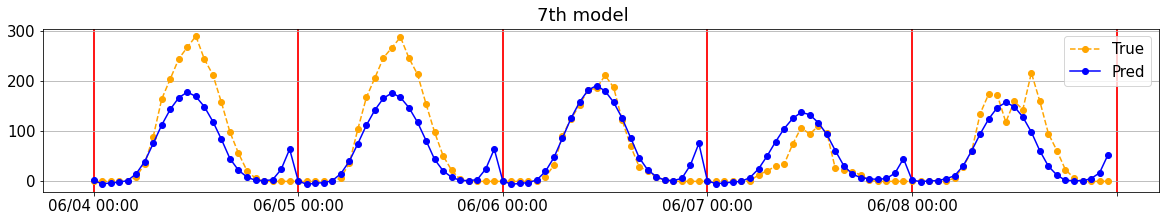

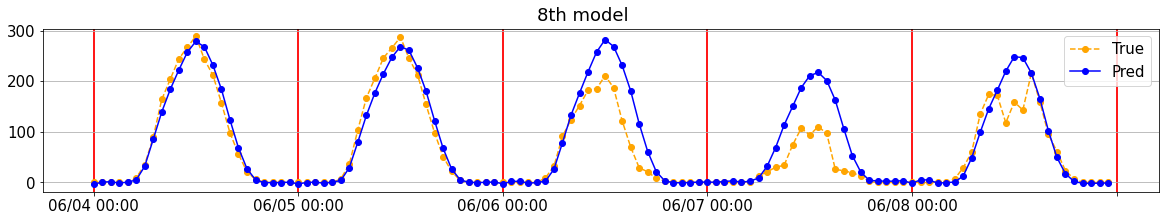

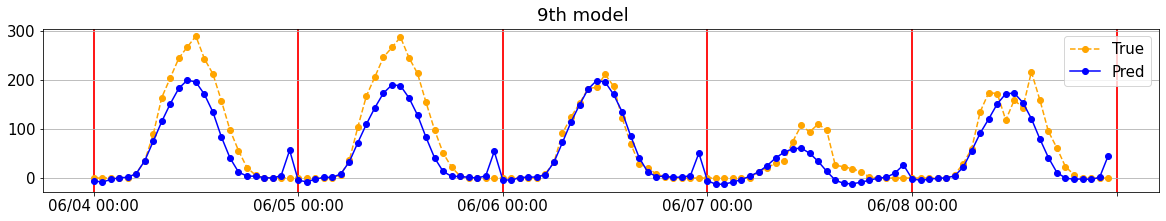

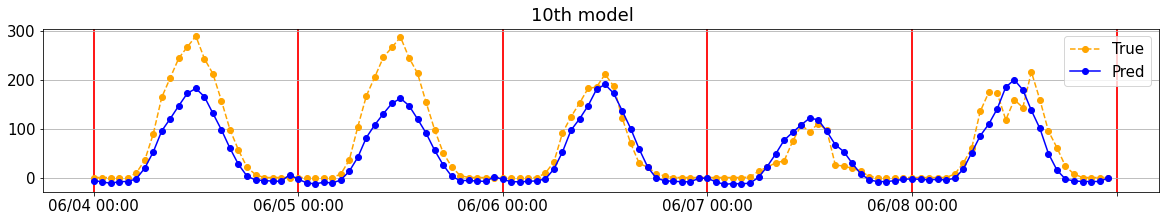

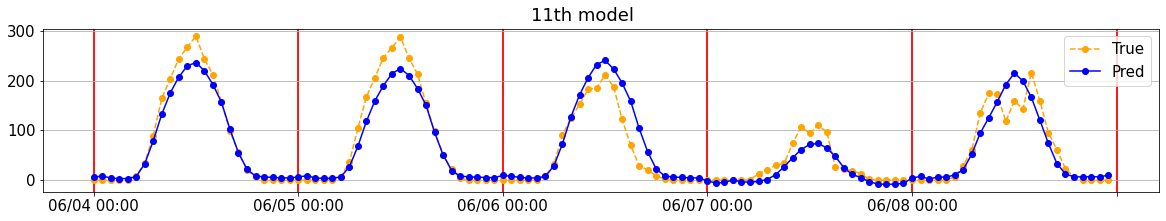

In [9]:
for i in range(11):
    y_pred = result_df['%dth model' % (i +1)][120:240]
    y_test = result_df['y_test'][120:240]

    fig = plt.figure(figsize=(20,3))
    ax = fig.add_subplot(1,1,1)

    plt.plot(y_test, marker='o',ls='--',c='orange', label = 'True')
    ax.plot(y_pred, 'bo-', label = 'Pred')
    ax.legend()

    x_ticks = np.arange(0, 120 + 1, 24)   
    ax.set_xticks(x_ticks)
    ax.grid(which='both')
    ax.grid(which='major', alpha=1.0, linewidth=1.8, color='r', axis='x')
    plt.suptitle('%dth model' % (i + 1))
    plt.show()